In [1]:
import matplotlib.pyplot as plt
import cv2 #openCV

In [2]:
cat4= cv2.imread('C:/Users/moin/Downloads/CATS_DOGS/CATS_DOGS/train/CAT/4.jpg')

In [3]:
cat4= cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

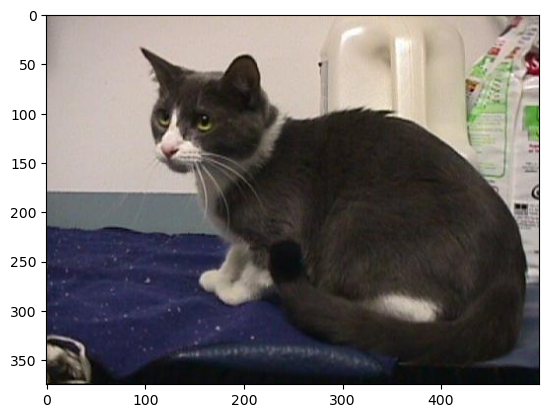

In [4]:
plt.imshow(cat4)

In [5]:
cat4.shape

(375, 500, 3)

In [6]:
dog2=cv2.imread('C:/Users/moin/Downloads/CATS_DOGS/CATS_DOGS/train/DOG/3.jpg')

In [7]:
dog2.shape

(375, 500, 3)

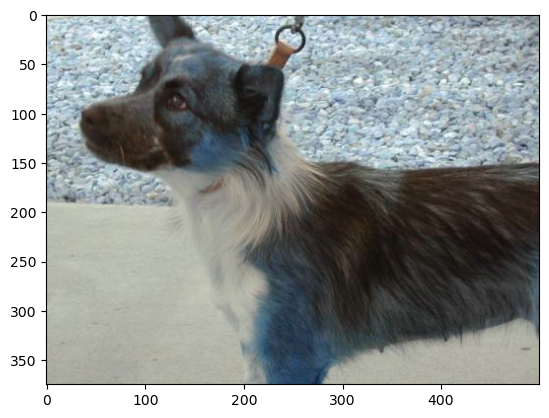

In [8]:
plt.imshow(dog2)

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
image_gen= ImageDataGenerator(rotation_range=30,
                             width_shift_range=0.15,
                             rescale=1/255,
                             shear_range=0.1,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

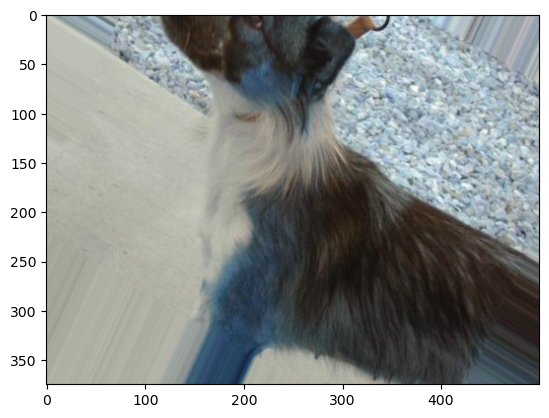

In [11]:
plt.imshow(image_gen.random_transform(dog2))

## Preparing the Data for the model

There is too much data for us to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

### Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us. Check out the documentation for a full list of all the parameters you can use here!

In [12]:
image_gen.flow_from_directory('C:/Users/moin/Downloads/CATS_DOGS/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [13]:
image_shape= (150,150,3)

In [14]:
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [15]:
model= Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [17]:
batch=16

train_image_gen = image_gen.flow_from_directory('C:/Users/moin/Downloads/CATS_DOGS/CATS_DOGS/train',
                                               target_size= (150,150),
                                               batch_size=16,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [18]:
batch=16

test_image_gen = image_gen.flow_from_directory('C:/Users/moin/Downloads/CATS_DOGS/CATS_DOGS/train',
                                               target_size= (150,150),
                                               batch_size=batch,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


# Predicting on new images

In [19]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [20]:
results = model.fit_generator(train_image_gen, epochs=1, 
                              steps_per_epoch=150, 
                              validation_data=test_image_gen, 
                              validation_steps=12)

C:\Users\moin\AppData\Local\Temp\ipykernel_12420\104447913.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen, epochs=1,




150/150 [==============================] - 98s 634ms/step - loss: 0.7061 - accuracy: 0.5129 - val_loss: 0.6938 - val_accuracy: 0.5052


In [21]:
results.history['accuracy']

[0.5129166841506958]

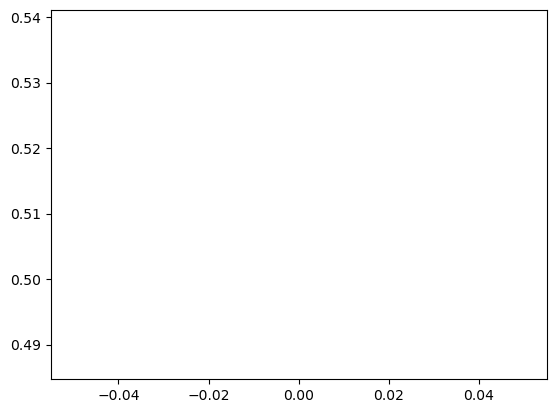

In [50]:
plt.plot(results.history['accuracy'])

# Loading Model

In [26]:
from keras.models import load_model

new_model = load_model('C:/Users/moin/Downloads/ePOCHES/cat_dog_100epochs.h5')

dog_file = 'C:/Users/moin/Downloads/CATS_DOGS/CATS_DOGS/test/DOG/9914.jpg'

from keras.preprocessing import image

dog_img = image.load_img(dog_file, target_size=(150, 150))


In [32]:
dog_file = image.img_to_array(dog_img)

In [33]:
dog_file.shape

(150, 150, 3)

In [36]:
import numpy as np

dog_img = np.expand_dims(dog_file,axis=0)

In [37]:
dog_img.shape

(1, 150, 150, 3)

In [38]:
dog_img = dog_img/255

In [39]:
prediction_prob = new_model.predict(dog_img)

1/1 [==============================] - 0s 173ms/step


In [40]:
print(prediction_prob)

[[0.7332227]]


In [41]:
predictions = new_model.predict(dog_img)

predicted_classes = np.argmax(predictions, axis=1)

1/1 [==============================] - 0s 33ms/step


In [46]:
print(prediction_prob)

[[0.7332227]]


In [43]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess your test image (adjust the path accordingly)
img_path = 'C:/Users/moin/Downloads/CATS_DOGS/CATS_DOGS/test/DOG/9914.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)  # Add a batch dimension

# Use model to make predictions
predictions = new_model.predict(img)

# Apply a threshold (e.g., 0.5) to get the predicted class label
predicted_class = (predictions > 0.5).astype(int)[0][0]

# Print the predicted class label (0 for cat, 1 for dog)
if predicted_class == 0:
    print("Predicted class: Cat")
else:
    print("Predicted class: Dog")


1/1 [==============================] - 0s 20ms/step
Predicted class: Dog


# Applying VGG16

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define directories for train and test data
train_dir = 'CATS_DOGS/CATS_DOGS/train'
test_dir = 'CATS_DOGS/CATS_DOGS/test'

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 16

# Create data generators for train and test data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_width, img_height),
                                                  batch_size=batch_size,
                                                  class_mode='binary')

# Load pre-trained VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new sequential model
model = Sequential()

# Add the VGG16 base model
model.add(base_model)
# Flatten the output of the VGG16 base model
model.add(Flatten())

# Add custom top layers for classification
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=10,
                    validation_data=test_generator,
                    validation_steps=len(test_generator))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print('Test accuracy:', test_acc)

